# 🩺 HEALTHCARE ANALYTICS
***
##  MediInsights: Exploratory Data Analysis of Hospital Records 📊

**EDA :** Is the process of investigating datasets by analyzing their key characteristics using **statistical summaries, graphical representations, and data profiling techniques** to uncover patterns, detect anomalies, and form hypotheses for further analysis.

### Introduction

This notebook begins with a descriptive exploration of the patient and hospital datasets using summary statistics and visual analysis. It then examines patterns in patient demographics, admission types, and medical conditions to understand what factors may influence hospital stay duration. Finally, relationships between variables such as department, billing, and severity of illness are analyzed further. Key findings and insights are documented in the accompanying README file.

## 1. Preliminaries 🔧

**Importing the necessary Python libraries** for data manipulation, analysis, and visualization. Set up the plotting environment using **matplotlib and seaborn** to ensure consistent styling and clear visual output throughout the notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading of the Data 📥

Load the hospital-related datasets into DataFrames and preview the first and last few rows to understand their structure and contents.

In [2]:
# Load the Excel file
file_path = "https://raw.githubusercontent.com/ChandrashekarDevarasetti/Visual-Healthcare-Insights-Python-EDA-Power-BI-Dashboards/main/Data/healthcare_dataset.xlsx" 
xls = pd.ExcelFile(file_path)

# Load each sheet into a separate DataFrame
patients_details_df = pd.read_excel(xls, sheet_name='Patients_details')
hospital_details_df = pd.read_excel(xls, sheet_name='Hospital_Details')
doctor_details_df = pd.read_excel(xls, sheet_name='Doctor_Details')
patients_data_df = pd.read_excel(xls, sheet_name='Patients_Data')

# Preview the data
print("✅ Patients Details:")
print(patients_details_df.head(), '\n')

print("✅ Hospital Details:")
print(hospital_details_df.head(), '\n')

print("✅ Doctor Details:")
print(doctor_details_df.head(), '\n')

print("✅ Patients Data:")
print(patients_data_df.head())


✅ Patients Details:
   P_ID               Name   Age  Gender Blood Type
0     1        aAroN ADaMS  38.0  Female         O-
1     2      aAROn aguIRRe  36.0    Male         A-
2     3     AArOn AnderSoN  50.0  Female         A+
3     4  aaRON AndeRSoN md  20.0  Female         A-
4     5       AAron ArCHER   NaN  Female         B- 

✅ Hospital Details:
                        Hospital  H_id
0  Abbott and Thompson, Sullivan     1
1                     Abbott Inc     2
2                     Abbott Ltd     3
3     Abbott Moore and Williams,     4
4     Abbott, Peters and Hoffman     5 

✅ Doctor Details:
            Doctor  D_ID
0    Aaron Acevedo     1
1      Aaron Adams     2
2    Aaron Aguilar     3
3  Aaron Alexander     4
4   Aaron Anderson     5 

✅ Patients Data:
   P_ID   D_ID   H_ID Medical Condition Date of Admission Insurance Provider  \
0   1.0  30256  16666            Cancer        2021-03-10   UnitedHealthcare   
1   2.0  21581  26920          Diabetes        2023-02-26   Uni

In [3]:
# Preview the data
print("✅ Patients Details:")
print(patients_details_df.tail(), '\n')

print("✅ Hospital Details:")
print(hospital_details_df.tail(), '\n')

print("✅ Doctor Details:")
print(doctor_details_df.tail(), '\n')

print("✅ Patients Data:")
print(patients_data_df.tail())


✅ Patients Details:
        P_ID           Name   Age  Gender Blood Type
54939  54940      ZOe bLacK  77.0  Female         A-
54940  54941    Zoe Jackson  38.0    Male         A-
54941  54942  ZoE ROdRiGuEz  53.0  Female         O+
54942  54943      Zoe SmITh  36.0    Male        AB-
54943  54944      ZoE WhIte  25.0  Female        AB+ 

✅ Hospital Details:
             Hospital   H_id
39871    Zuniga-Lopez  39872
39872     Zuniga-Mann  39873
39873  Zuniga-Marquez  39874
39874   Zuniga-Mcneil  39875
39875    Zuniga-White  39876 

✅ Doctor Details:
            Doctor   D_ID
40336     Zoe Khan  40337
40337   Zoe Knight  40338
40338  Zoe Nichols  40339
40339  Zoe Roberts  40340
40340  Zoe Wallace  40341 

✅ Patients Data:
          P_ID   D_ID   H_ID Medical Condition Date of Admission  \
55495  54941.0   2127  20144            Asthma        2021-07-25   
55496  54942.0   9999  20132            Cancer        2024-03-22   
55497  54942.0   9999  20132            Cancer        2024-03-22   

## 3. Data Cleaning & Preparation 🔍 

### a. Merging All Datasets 🔗

To perform a complete analysis, we merge all four datasets using their respective key columns (**P_ID, D_ID, H_ID**). This helps consolidate **patient details, doctor information, hospital data, and medical history** into a single unified DataFrame for further exploration and visualization.

In [4]:
# Step 1: Merge patients_data with patients_details on P_ID
merged_df = pd.merge(patients_data_df, patients_details_df, on='P_ID', how='left')

# Step 2: Merge with doctor_details on D_ID
merged_df = pd.merge(merged_df, doctor_details_df, on='D_ID', how='left')

# Step 3: Merge with hospital_details on H_ID (note H_id in one table, H_ID in the other)
# If needed, rename for consistency
hospital_details_df.rename(columns={'H_id': 'H_ID'}, inplace=True)
merged_df = pd.merge(merged_df, hospital_details_df, on='H_ID', how='left')

In [5]:
merged_df.head() #Top 5 Elements

,P_ID,D_ID,H_ID,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
0,1.0,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,Lipitor,Inconclusive,aAroN ADaMS,38.0,Female,O-,Norma Li,Hart LLC
1,2.0,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,Aspirin,NaN,aAROn aguIRRe,36.0,Male,A-,Katrina Luna,Murray-Shelton
2,3.0,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,Aspirin,Inconclusive,AArOn AnderSoN,50.0,Female,A+,Kenneth Jennings,Tanner-Cox
3,4.0,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,Paracetamol,Abnormal,aaRON AndeRSoN md,20.0,Female,A-,Tammy Perez,Ritter LLC
4,5.0,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive,AAron ArCHER,NaN,Female,B-,Cynthia Villanueva,"Montes Case and Mendez,"


In [6]:
# Information of table
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55500 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   P_ID                55497 non-null  float64       
 1   D_ID                55500 non-null  int64         
 2   H_ID                55500 non-null  int64         
 3   Medical Condition   55500 non-null  object        
 4   Date of Admission   55500 non-null  datetime64[ns]
 5   Insurance Provider  55500 non-null  object        
 6   Billing Amount      55500 non-null  float64       
 7   Room Number         55500 non-null  int64         
 8   Admission Type      55500 non-null  object        
 9   Discharge Date      55500 non-null  datetime64[ns]
 10  Medication          55500 non-null  object        
 11  Test Results        55492 non-null  object        
 12  Name                55497 non-null  object        
 13  Age                 55493 non-null  float64   

In [7]:
# Describe the Table
merged_df.describe()

,P_ID,D_ID,H_ID,Billing Amount,Room Number,Age
count,55497.000000,55500.000000,55500.000000,55500.000000,55500.000000,55493.000000
mean,27478.106979,20195.877604,20362.033892,25539.316097,301.134829,51.539041
std,15860.379707,11531.448639,11142.462206,14211.454431,115.243069,19.602661
min,1.000000,1.000000,1.000000,-2008.492140,101.000000,13.000000
25%,13731.000000,10152.750000,11108.750000,13241.224652,202.000000,35.000000
50%,27487.000000,20051.500000,20513.500000,25538.069376,302.000000,52.000000
75%,41207.000000,30112.250000,29667.000000,37820.508436,401.000000,68.000000
max,54944.000000,40341.000000,39876.000000,52764.276736,500.000000,89.000000


In [8]:
# Get descriptive statistics for all columns, not just the numeric ones.
merged_df.describe(include="all")

C:\Users\PavanPutra\AppData\Local\Temp\ipykernel_15892\3090344338.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include="all")
C:\Users\PavanPutra\AppData\Local\Temp\ipykernel_15892\3090344338.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include="all")


,P_ID,D_ID,H_ID,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
count,55497.000000,55500.000000,55500.000000,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55492,55497,55493.000000,55497,55497,55500,55500
unique,NaN,NaN,NaN,6,1827,5,NaN,NaN,3,1856,5,3,49974,NaN,2,8,40341,39876
top,NaN,NaN,NaN,Arthritis,2024-03-16 00:00:00,Cigna,NaN,NaN,Elective,2020-03-15 00:00:00,Lipitor,Abnormal,jAmeS DaViS,NaN,Male,A-,Michael Smith,LLC Smith
freq,NaN,NaN,NaN,9308,50,11249,NaN,NaN,18655,53,11140,18624,3,NaN,27773,6969,27,44
first,NaN,NaN,NaN,NaN,2019-05-08 00:00:00,NaN,NaN,NaN,NaN,2019-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2024-05-07 00:00:00,NaN,NaN,NaN,NaN,2024-06-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,27478.106979,20195.877604,20362.033892,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN,NaN,51.539041,NaN,NaN,NaN,NaN
std,15860.379707,11531.448639,11142.462206,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN,NaN,19.602661,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN
25%,13731.000000,10152.750000,11108.750000,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN


In [9]:
# Check for NaNs etc
merged_df.count()

P_ID                  55497
D_ID                  55500
H_ID                  55500
Medical Condition     55500
Date of Admission     55500
Insurance Provider    55500
Billing Amount        55500
Room Number           55500
Admission Type        55500
Discharge Date        55500
Medication            55500
Test Results          55492
Name                  55497
Age                   55493
Gender                55497
Blood Type            55497
Doctor                55500
Hospital              55500
dtype: int64

In [10]:
len(merged_df)

55500

In [11]:
# Datatypes
merged_df.dtypes

P_ID                         float64
D_ID                           int64
H_ID                           int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [12]:
# Length of dataframe
len(merged_df)

55500

In [13]:
# Columns
merged_df.columns

Index(['P_ID', 'D_ID', 'H_ID', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'Name', 'Age', 'Gender',
       'Blood Type', 'Doctor', 'Hospital'],
      dtype='object')

###  b. Standardizing Name Fields & Removing Duplicates in merged data🧾

After merging all datasets, we ensure the `Name`, `Doctor`, and `Hospital` columns are clean and consistently formatted. This helps eliminate redundancy, avoids mismatched values, and improves overall data quality for analysis and visualization.


In [14]:
# Standardize name columns in the merged DataFrame
merged_df['Name'] = merged_df['Name'].str.strip().str.title()
merged_df['Doctor'] = merged_df['Doctor'].str.strip().str.title()
merged_df['Hospital'] = merged_df['Hospital'].str.strip().str.title()

In [15]:
merged_df.head()

,P_ID,D_ID,H_ID,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
0,1.0,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,Lipitor,Inconclusive,Aaron Adams,38.0,Female,O-,Norma Li,Hart Llc
1,2.0,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,Aspirin,NaN,Aaron Aguirre,36.0,Male,A-,Katrina Luna,Murray-Shelton
2,3.0,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,Aspirin,Inconclusive,Aaron Anderson,50.0,Female,A+,Kenneth Jennings,Tanner-Cox
3,4.0,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,Paracetamol,Abnormal,Aaron Anderson Md,20.0,Female,A-,Tammy Perez,Ritter Llc
4,5.0,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive,Aaron Archer,NaN,Female,B-,Cynthia Villanueva,"Montes Case And Mendez,"


###  c. Data Integrity Validation for Foreign Keys (P_ID, D_ID, H_ID) 🔍 
Identifying Mismatches and Foreign Key Issues Between P_ID, D_ID, and H_ID in Merged Data and Master Tables

In [16]:
# Check for Unmatched Patient IDS (P_ID)
invalidid_pids = merged_df[merged_df['P_ID'].isin(~patients_details_df['P_ID'])]

# Check for Unmatched Patient IDS (D_ID)
invalidid_hids = merged_df[merged_df['H_ID'].isin(~hospital_details_df['H_ID'])]

# Check for Unmatched Patient IDS (D_ID)
invalidid_dids = merged_df[merged_df['D_ID'].isin(~doctor_details_df['D_ID'])]

print("invalidid_pids:", invalidid_pids)
print("invalidid_hids:", invalidid_hids)
print("invalidid_dids:", invalidid_dids)

invalidid_pids: Empty DataFrame
Columns: [P_ID, D_ID, H_ID, Medical Condition, Date of Admission, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Name, Age, Gender, Blood Type, Doctor, Hospital]
Index: []
invalidid_hids: Empty DataFrame
Columns: [P_ID, D_ID, H_ID, Medical Condition, Date of Admission, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Name, Age, Gender, Blood Type, Doctor, Hospital]
Index: []
invalidid_dids: Empty DataFrame
Columns: [P_ID, D_ID, H_ID, Medical Condition, Date of Admission, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Name, Age, Gender, Blood Type, Doctor, Hospital]
Index: []


### d. Handling Missing Values🔍

Identifing and appropriately handling missing values in the dataset to prevent incomplete analysis or errors during visualization.

In [17]:
# Summary of missing values
print("Missing Values Summary:")
print(merged_df.isnull().sum())

Missing Values Summary:
P_ID                  3
D_ID                  0
H_ID                  0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          8
Name                  3
Age                   7
Gender                3
Blood Type            3
Doctor                0
Hospital              0
dtype: int64


In [18]:
# Drop rows where essntial patient info is missing (eg. Patient ID)
df = merged_df.dropna(subset=['P_ID'])

In [19]:
df.count()

P_ID                  55497
D_ID                  55497
H_ID                  55497
Medical Condition     55497
Date of Admission     55497
Insurance Provider    55497
Billing Amount        55497
Room Number           55497
Admission Type        55497
Discharge Date        55497
Medication            55497
Test Results          55489
Name                  55497
Age                   55493
Gender                55497
Blood Type            55497
Doctor                55497
Hospital              55497
dtype: int64

In [20]:
# Fill Missing numerical values (eg., Age) with Median
df['Age'] = df['Age'].fillna(df['Age'].median())
df.count()

C:\Users\PavanPutra\AppData\Local\Temp\ipykernel_15892\3654226747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].median())


P_ID                  55497
D_ID                  55497
H_ID                  55497
Medical Condition     55497
Date of Admission     55497
Insurance Provider    55497
Billing Amount        55497
Room Number           55497
Admission Type        55497
Discharge Date        55497
Medication            55497
Test Results          55489
Name                  55497
Age                   55497
Gender                55497
Blood Type            55497
Doctor                55497
Hospital              55497
dtype: int64

In [21]:
df.isnull().sum()

P_ID                  0
D_ID                  0
H_ID                  0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          8
Name                  0
Age                   0
Gender                0
Blood Type            0
Doctor                0
Hospital              0
dtype: int64

In [22]:
# Fill missing Categorical Values (e.g., Test Results) with mode
df['Test Results'] = df['Test Results'].fillna(df['Test Results'].mode()[0])
df.count()

C:\Users\PavanPutra\AppData\Local\Temp\ipykernel_15892\4278128182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Test Results'] = df['Test Results'].fillna(df['Test Results'].mode()[0])


P_ID                  55497
D_ID                  55497
H_ID                  55497
Medical Condition     55497
Date of Admission     55497
Insurance Provider    55497
Billing Amount        55497
Room Number           55497
Admission Type        55497
Discharge Date        55497
Medication            55497
Test Results          55497
Name                  55497
Age                   55497
Gender                55497
Blood Type            55497
Doctor                55497
Hospital              55497
dtype: int64

In [23]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
P_ID                  0
D_ID                  0
H_ID                  0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Name                  0
Age                   0
Gender                0
Blood Type            0
Doctor                0
Hospital              0
dtype: int64


### e. Handling Duplicate Records 🔍

Identifing and appropriately handling missing values in the dataset to prevent incomplete analysis or errors during visualization.

In [24]:
# Check for duplicates (entire row match)
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 534


In [25]:
# Viewing duplicate rows 
duplicates = df[df.duplicated()]
print("\nDuplicate Rows Preview:")
print(duplicates.head())


Duplicate Rows Preview:
        P_ID   D_ID   H_ID Medical Condition Date of Admission  \
226    226.0  12193  26200      Hypertension        2022-12-15   
376    375.0   4152  32496      Hypertension        2022-01-02   
609    607.0  13634  33309          Diabetes        2022-03-27   
874    871.0  11324   5130         Arthritis        2024-01-17   
1023  1019.0  24223  11717          Diabetes        2023-12-24   

     Insurance Provider  Billing Amount  Room Number Admission Type  \
226    UnitedHealthcare     1983.568297          192       Elective   
376               Cigna    16294.907725          180         Urgent   
609               Aetna    39525.674902          246      Emergency   
874    UnitedHealthcare     4177.715918          450         Urgent   
1023              Aetna     1903.879223          385       Elective   

     Discharge Date   Medication  Test Results                Name   Age  \
226      2023-01-13    Ibuprofen        Normal       Abigail Young  41.0   

In [26]:
# Drop duplicate rows 
df = df.drop_duplicates()

In [27]:
len(df)

54963

In [28]:
# drop based on a specific subset (e.g., Patient_ID + Date)
df1 = df.drop_duplicates(subset=['P_ID', 'Date of Admission'])
len(df1)

54963

In [29]:
print(f"\nData shape after removing duplicates: {df.shape}")


Data shape after removing duplicates: (54963, 18)


###  f. Converting Data Types 🔍

Ensure all columns have correct data types for analysis.

In [30]:
# Convert 'Date of Admission' & 'Date of Discharge' to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce', dayfirst=True) # we are telling Date start with Day  
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce', format='%d-%m-%y') #Customize the date format

df.dtypes

P_ID                         float64
D_ID                           int64
H_ID                           int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [31]:
print(df)

          P_ID   D_ID   H_ID Medical Condition Date of Admission  \
0          1.0  30256  16666            Cancer        2021-03-10   
1          2.0  21581  26920          Diabetes        2023-02-26   
2          3.0  22170  35639            Asthma        2020-12-18   
3          4.0  36870  31042      Hypertension        2021-03-28   
4          5.0   9015  25936            Cancer        2021-01-10   
...        ...    ...    ...               ...               ...   
55494  54940.0  32747  21399          Diabetes        2022-09-24   
55495  54941.0   2127  20144            Asthma        2021-07-25   
55496  54942.0   9999  20132            Cancer        2024-03-22   
55498  54943.0  26092  18852           Obesity        2022-02-24   
55499  54944.0  14894  23054          Diabetes        2020-05-29   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
0       UnitedHealthcare    26052.106404          363       Elective   
1       UnitedHealthcare    27087.56055

In [32]:
#Converting format of date
custom_date = df['Date of Admission'].dt.strftime('%d-%m-%Y')

In [33]:
custom_date

0        10-03-2021
1        26-02-2023
2        18-12-2020
3        28-03-2021
4        10-01-2021
            ...    
55494    24-09-2022
55495    25-07-2021
55496    22-03-2024
55498    24-02-2022
55499    29-05-2020
Name: Date of Admission, Length: 54963, dtype: object

In [34]:
custom_date.dtypes

dtype('O')

In [35]:
# Convert Billing Amount to numric(float)
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors = 'coerce')
df.dtypes

P_ID                         float64
D_ID                           int64
H_ID                           int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [36]:
# Convert P_ID to Str
df['P_ID'] = df['P_ID'].astype(str)
df.dtypes

P_ID                          object
D_ID                           int64
H_ID                           int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [37]:
# Again Coverting P_ID to numeric
df['P_ID'] = pd.to_numeric(df['P_ID'])
df.dtypes

P_ID                         float64
D_ID                           int64
H_ID                           int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [38]:
# Convert 'Age' to integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

In [39]:
print(df.dtypes)

P_ID                         float64
D_ID                           int64
H_ID                           int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                            Int64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object


### g.  Creating New Derived Columns 🔍

Creating useful new columns like Length of Stay or Billing Category.

In [40]:
# Calculate length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Flag high billing amounts
df['High Bill Flag'] = df['Billing Amount'].apply(lambda x: 'High' if x > 30000 else 'Normal')

df.head()

,P_ID,D_ID,H_ID,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,High Bill Flag
0,1.0,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,Lipitor,Inconclusive,Aaron Adams,38,Female,O-,Norma Li,Hart Llc,19,Normal
1,2.0,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,Aspirin,Abnormal,Aaron Aguirre,36,Male,A-,Katrina Luna,Murray-Shelton,15,Normal
2,3.0,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,Aspirin,Inconclusive,Aaron Anderson,50,Female,A+,Kenneth Jennings,Tanner-Cox,28,High
3,4.0,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,Paracetamol,Abnormal,Aaron Anderson Md,20,Female,A-,Tammy Perez,Ritter Llc,12,Normal
4,5.0,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive,Aaron Archer,52,Female,B-,Cynthia Villanueva,"Montes Case And Mendez,",7,Normal


### h. Mapping Categorical Values 🔍

Mapping or encode categorical values for better readability or later modeling.

In [41]:
# Distinct Values
df['Admission Type'].unique() 

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [42]:
# Mapping Admission Type codes with given data
df['Admission Type Code'] = df['Admission Type'].map({'Elective' : 1,'Emergency' : 2, 'Urgent' :3})

In [43]:
df.head()

,P_ID,D_ID,H_ID,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,High Bill Flag,Admission Type Code
0,1.0,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,...,Inconclusive,Aaron Adams,38,Female,O-,Norma Li,Hart Llc,19,Normal,1
1,2.0,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,...,Abnormal,Aaron Aguirre,36,Male,A-,Katrina Luna,Murray-Shelton,15,Normal,2
2,3.0,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,...,Inconclusive,Aaron Anderson,50,Female,A+,Kenneth Jennings,Tanner-Cox,28,High,3
3,4.0,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,...,Abnormal,Aaron Anderson Md,20,Female,A-,Tammy Perez,Ritter Llc,12,Normal,1
4,5.0,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,...,Inconclusive,Aaron Archer,52,Female,B-,Cynthia Villanueva,"Montes Case And Mendez,",7,Normal,3


### i. Final Abnormality Checks 🔍

Verifing data consistency one last time — e.g., negative Length of Stay, future admission dates.

In [44]:
#Checkig for negative Length of Stay
df[df['Length of Stay'] < 0]

,P_ID,D_ID,H_ID,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,High Bill Flag,Admission Type Code


In [45]:
# Check if Admission Dates are in the future
df[df['Date of Admission'] > pd.Timestamp.today()]

,P_ID,D_ID,H_ID,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,High Bill Flag,Admission Type Code


## 4. Visulization Exploratory Data Analysis (EDA) 📊

Creating charts and graphs to make sense of **data patterns, trends, relationships, and anomalies visually**.

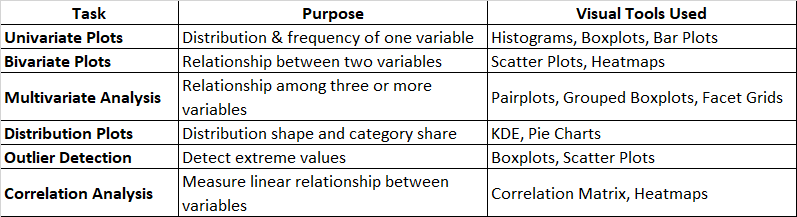


### a. Univariate Analysis 📊

Univariate Analysis is the simplest form of data analysis where **only one variable** is analyzed at a time to understand its distribution, central tendency, spread, and underlying patterns.

### i. Histograms: Show frequency distribution of numeric variables.

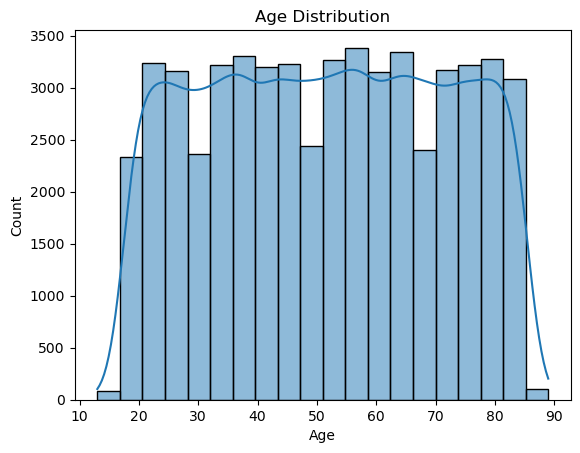

In [46]:
# Histogram for Age 
sns.histplot(df['Age'], bins = 20, kde = True) #Kernal Density Function
plt.title('Age Distribution')
plt.show()

### ii. Boxplots: Identify spread, central tendency, and outliers.

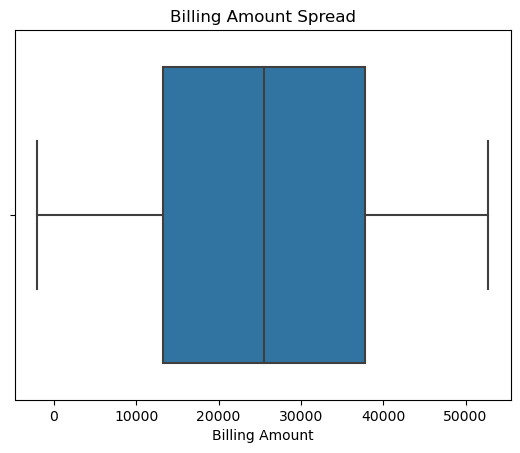

In [47]:
# Boxplot for Billing Amount
sns.boxplot(x=df['Billing Amount'])
plt.title('Billing Amount Spread')
plt.show()

### iii. Count plots: Visualize counts (number of occurrences) for categorical variables.

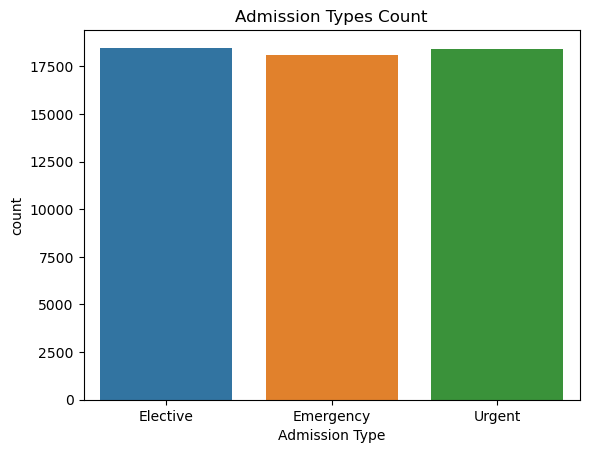

In [48]:
# Count Plot for Admission Type
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Types Count')
plt.show()

### b. Bivariate Analysis

Bivariate Analysis is the **analysis of two variables simultaneously** to explore the **relationship, association, or correlation** between them and understand how one variable affects or relates to the other.

### i. Scatter plots: 

Show how **two continuous variables** relate.

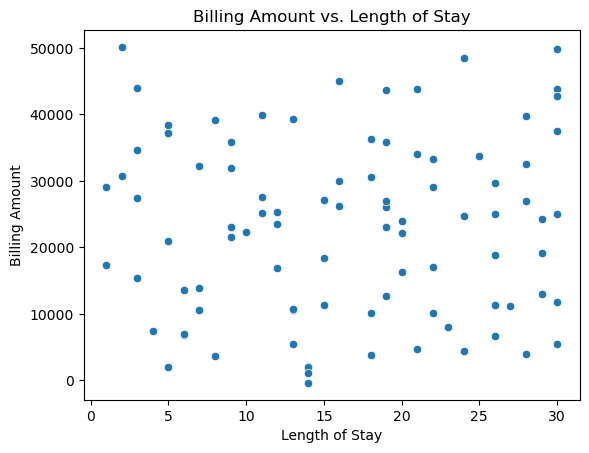

In [49]:
# Scatter Plot : Billing Amount vs. Length of Stay
sns.scatterplot(x='Length of Stay', y= 'Billing Amount', data = df.head(100))
plt.title('Billing Amount vs. Length of Stay')
plt.show()

### ii. Heatmaps: 

A heatmap is a data visualization technique that uses color gradients to represent the **magnitude or intensity of values in a two-dimensional matrix**.
It helps quickly identify **patterns, correlations, outliers, and areas of high or low concentration** within large datasets.

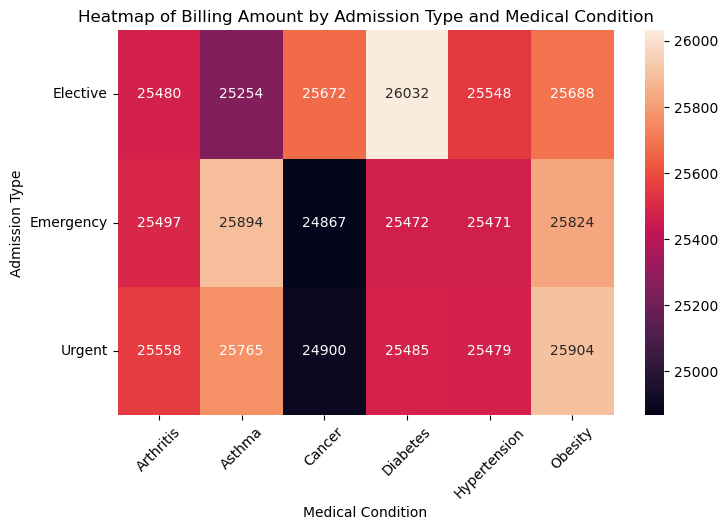

In [50]:
# Step 1: Create Pivot Table
pivot_table = df.pivot_table(
    index='Admission Type',      # rows
    columns='Medical Condition', # columns
    values='Billing Amount',      # values
    aggfunc='mean'                # or 'sum', depending on what you want
)

# Step 2: Plot Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt='.0f')
plt.title('Heatmap of Billing Amount by Admission Type and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Admission Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### iii. Box Plot

Compares the distribution of a continuous variable across different categories (**categorical vs continuous**).

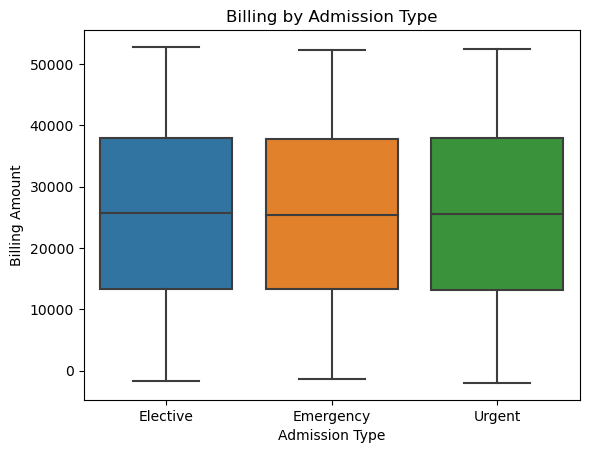

In [51]:
# Boxplot: Billing by Admission Type
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.title('Billing by Admission Type')
plt.show()

### iv. Bar plots: 

Visualize values (like **average, sum**) for categorical variables.

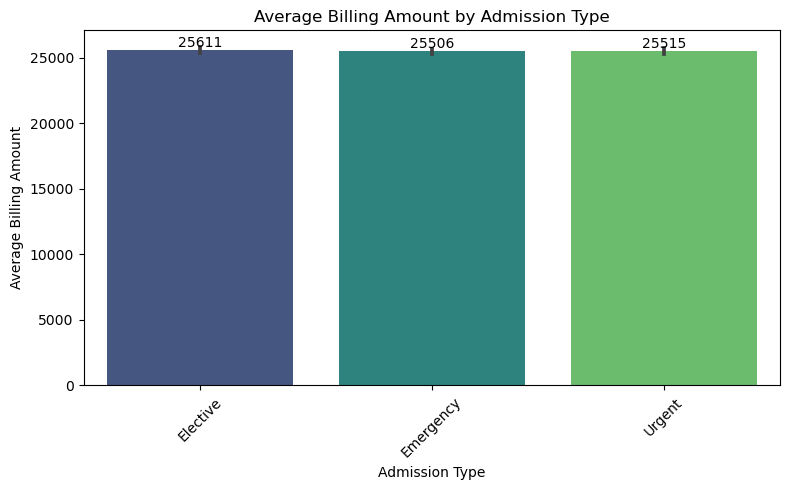

In [52]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Admission Type', y='Billing Amount', data=df, estimator=np.mean, palette='viridis')

# Data labels
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10)

plt.title('Average Billing Amount by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### v. Line Plot:

Shows the **trend or relationship between two continuous variables**, often across time.

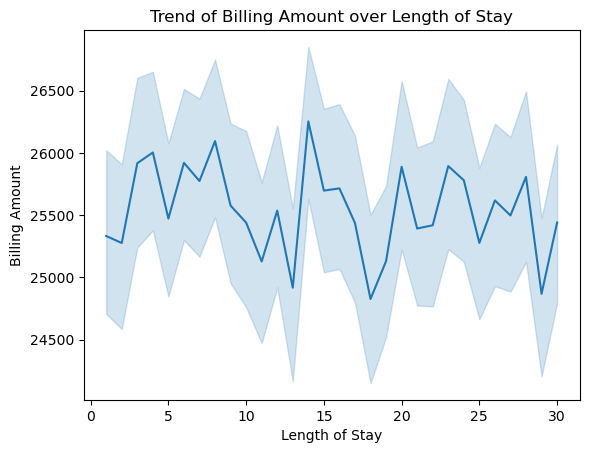

In [53]:
# Lineplot : Length of Stay vs. Billing Amount
sns.lineplot(x='Length of Stay', y ='Billing Amount', estimator = np.mean, data = df)
plt.title('Trend of Billing Amount over Length of Stay')
plt.show()

### c. Multivariate Analysis

Multivariate Analysis is the analysis of **more than two variables** simultaneously to understand complex **relationships, interactions, and combined effects among multiple variables** within a dataset.

### i. Grouped Boxplot :

 Compare distributions within categories

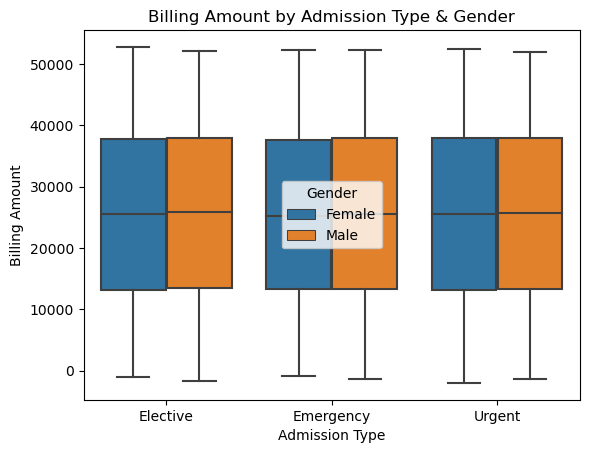

In [54]:
# Grouped Boxplot: Billing Amount across Gender & Admission Type
sns.boxplot(x='Admission Type', y= 'Billing Amount', hue = 'Gender', data = df)
plt.title('Billing Amount by Admission Type & Gender')
plt.show()

### ii. Paired Plots:

Multiple scatter plots combined for selected variables.

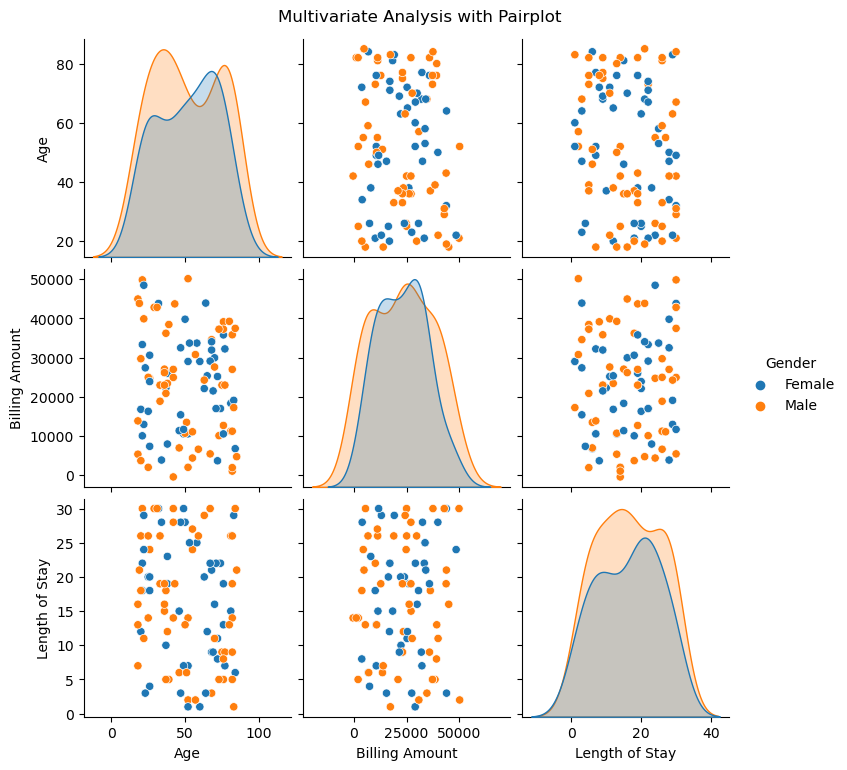

In [55]:
#Pariplot for Age, Billing Amount, Length of Stay

sns.pairplot(df.head(100), vars=['Age', 'Billing Amount', 'Length of Stay'], hue = 'Gender')
plt.suptitle('Multivariate Analysis with Pairplot', y=1.02) # y=1.02 → Adjusts the vertical position of the title.
plt.show()

### iii. Facet Grids: 

Create subplots based on categorical variables.

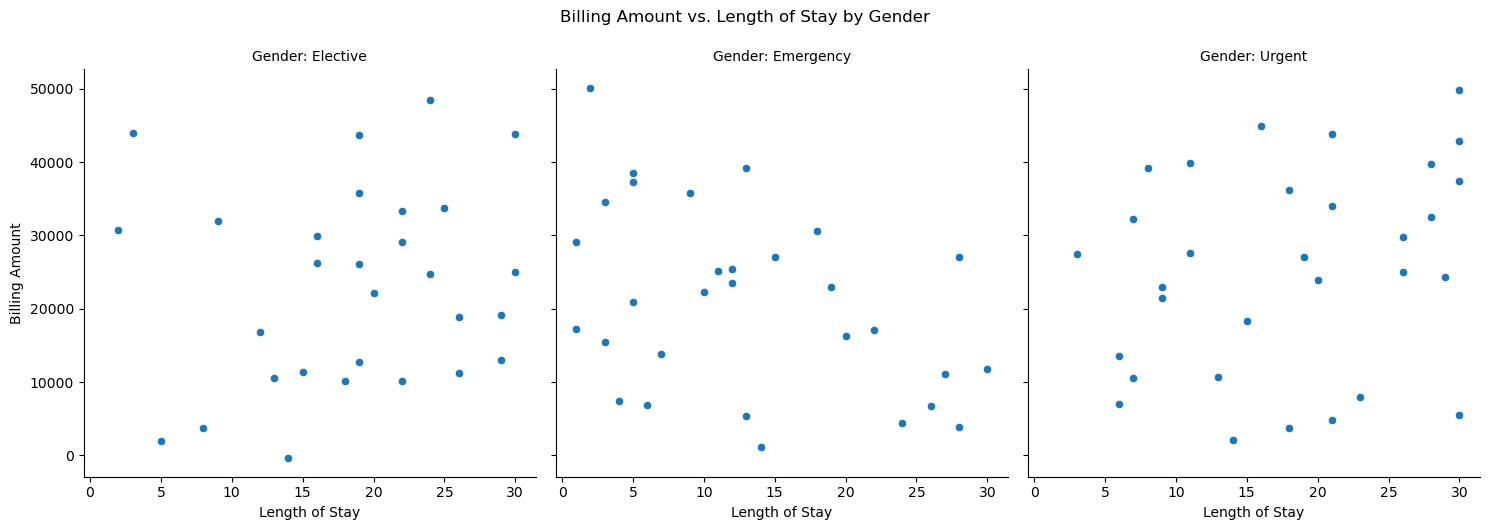

In [56]:
# Create a FacetGrid: Billing Amount vs. Length of Stay, split by Gender
g = sns.FacetGrid(df.head(100), col='Admission Type', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x='Length of Stay', y='Billing Amount')

g.set_axis_labels('Length of Stay', 'Billing Amount')
g.set_titles('Gender: {col_name}')
g.fig.suptitle('Billing Amount vs. Length of Stay by Gender', y=1.05)
plt.show()

### d. Distribution Plots

Understand data distribution **patterns and proportions**

### i. KDE (Kernel Density Estimation): 

Smooth curve showing variable distribution.

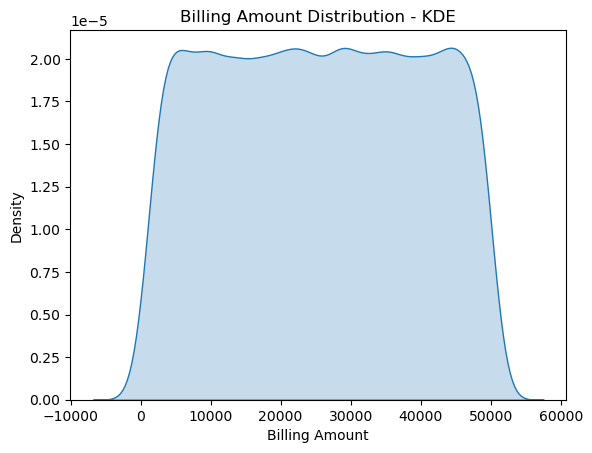

In [57]:
# KDE Plot for Billing Amount
sns.kdeplot(df['Billing Amount'], shade=True)
plt.title('Billing Amount Distribution - KDE')
plt.show()

### ii. Pie charts: 

Show percentage share of categories.

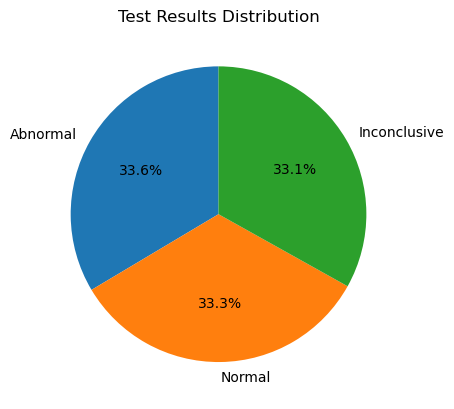

In [58]:
# Pie Chart: Gender Distribution
df['Test Results'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Test Results Distribution')
plt.ylabel('')
plt.show()

### e. Correlation Analysis

Measure the linear **relationship between continuous numerical variables** and identify highly correlated variables for insights or modeling.

### i. Correlation matrix & Heatmap

(values between -1 to 1)

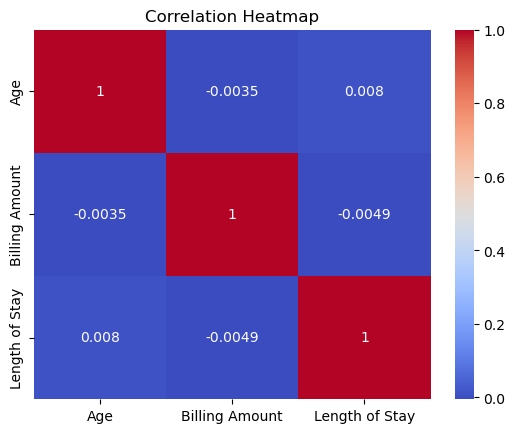

In [59]:
# Correlation Heatmap

corr = df[['Age', 'Billing Amount', 'Length of Stay']].corr() 
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()